<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_GMM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импорт
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
%matplotlib inline

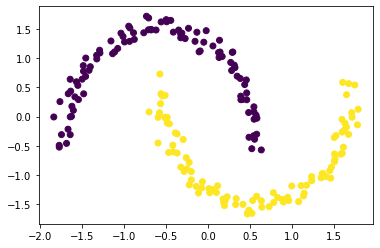

In [2]:
# данные
x, y = datasets.make_moons(n_samples=200,
                           noise=0.05,
                           random_state=42)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.show();

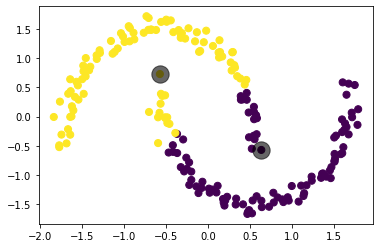

In [4]:
# обучение для 2 кластеров
n_clusters = 2
# создание экземпляра класса
GM = GaussianMixture(n_components=n_clusters, # ожидаем 2 кластера
                      covariance_type='full')  # произвольная форма кластера
# обучение модели
cluster = GM.fit(x_std)
# точные метки кластеров
pred_GM = cluster.predict(x_std)
# вероятности отнесения к кластерам
prob_GM = cluster.predict_proba(x_std)

centers = np.zeros((n_clusters,
                    x_std.shape[1]))           # матрица для координат центров
for i in range(n_clusters):
    density = mvn(cov=cluster.covariances_[i],
                  mean=cluster.means_[i]).logpdf(x_std)
    centers[i, :] = x_std[np.argmax(density)]

plt.scatter(x_std[:, 0], x_std[:, 1],c=pred_GM ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

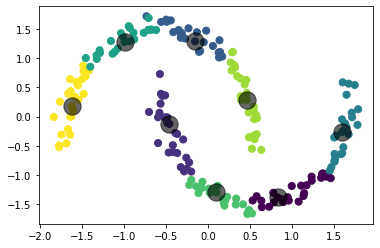

In [5]:
# обучение для 8 кластеров
n_clusters = 8
# создание экземпляра класса
GM = GaussianMixture(n_components=n_clusters, # ожидаем 2 кластера
                      covariance_type='full')  # произвольная форма кластера
# обучение модели
cluster = GM.fit(x_std)
# точные метки кластеров
pred_GM = cluster.predict(x_std)
# вероятности отнесения к кластерам
prob_GM = cluster.predict_proba(x_std)

centers = np.zeros((n_clusters,
                    x_std.shape[1]))           # матрица для координат центров
for i in range(n_clusters):
    density = mvn(cov=cluster.covariances_[i],
                  mean=cluster.means_[i]).logpdf(x_std)
    centers[i, :] = x_std[np.argmax(density)]

plt.scatter(x_std[:, 0], x_std[:, 1],c=pred_GM ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);